In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\mauri\OneDrive\Escritorio\Data Analysis\6.X'

In [4]:
df = pd.read_pickle(os.path.join(path, 'airbnb_ny_open_data_cleaned.pkl'))

In [5]:
# fill the Length and Width missing valus with median
df['number_reviews'] = df['number_reviews'].fillna(df['number_reviews'].median())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [6]:
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price,service_fee,minimum_nights,number_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,13974863,Private Room in Lower East Side Apartment,651454903,unconfirmed,Maddy,Manhattan,Lower East Side,40.72310,-73.99270,United States,...,2010.0,689.0,138.0,NaN,0.0,NaN,0.74,1.0,1.0,0.0
1,13975968,Furnished Studio on Upper East Side,23765993225,verified,Jarid,Manhattan,Upper East Side,40.77138,-73.95353,United States,...,2006.0,353.0,71.0,NaN,0.0,NaN,0.74,4.0,1.0,0.0
2,13977072,King size room in foodie heaven!,3470529701,unconfirmed,Michael,Queens,Astoria,40.77084,-73.92601,United States,...,2017.0,484.0,97.0,NaN,0.0,NaN,0.74,1.0,1.0,0.0
3,24670153,Sunny and Zen room in Chelsea,25353219525,verified,Raymond,Manhattan,Chelsea,40.74147,-73.99908,United States,...,2015.0,1119.0,224.0,NaN,0.0,NaN,0.74,3.0,1.0,0.0
4,45546540,Private Room in Lower East Side Apartment,21067567029,verified,Maddy,Manhattan,Lower East Side,40.72310,-73.99270,United States,...,2010.0,689.0,138.0,NaN,0.0,NaN,0.74,1.0,1.0,0.0


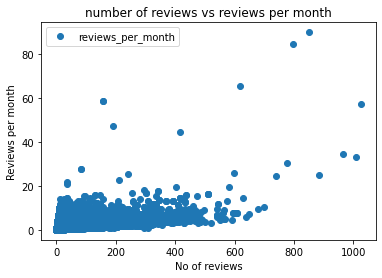

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'number_reviews', y='reviews_per_month',style='o') 
plt.title('number of reviews vs reviews per month')  
plt.xlabel('No of reviews')  
plt.ylabel('Reviews per month')  
plt.show()

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['number_reviews'].values.reshape(-1,1)
y = df['reviews_per_month'].values.reshape(-1,1)

In [9]:
X

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [33.],
       [ 6.],
       [ 2.]])

In [10]:
y

array([[0.74],
       [0.74],
       [0.74],
       ...,
       [0.31],
       [0.08],
       [0.03]])

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Create a regression object.

regression = LinearRegression() 

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

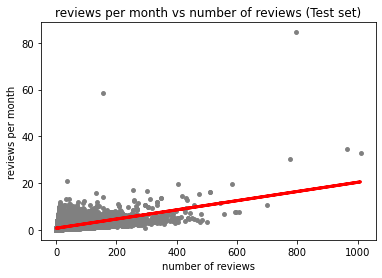

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('reviews per month vs number of reviews (Test set)')
plot_test.xlabel('number of reviews')
plot_test.ylabel('reviews per month')
plot_test.show()

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [17]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01961568]]
Mean squared error:  1.6852979177088725
R2 score:  0.36899716678672656


In [18]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.53,1.031932
1,0.17,0.776928
2,0.74,0.737697
3,3.63,2.228488
4,0.74,0.737697
5,0.13,0.757313
6,1.85,2.640418
7,0.29,0.894622
8,0.74,0.737697
9,0.04,0.757313


In [20]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [21]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01961568]]
Mean squared error:  1.6804416325197227
R2 score:  0.35846277090576095


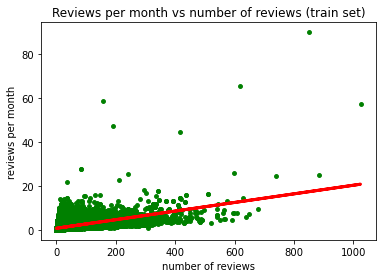

In [23]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Reviews per month vs number of reviews (train set)')
plot_test.xlabel('number of reviews')
plot_test.ylabel('reviews per month')
plot_test.show()

#### After comparing the actual result with the predicted and taking into the account the statical information we can conclude that this model wouldn't be the best to predict this variables, specially because the mean squared error is considerably high